Name: Attia Inayat

Roll no: SP23-BAI-012

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 1. Linear Regression:

1. Load the dataset (e.g., Boston Housing or a simple synthetic dataset).


In [12]:
boston_df=pd.read_csv('BostonHousing.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print("Shape : ",boston_df.shape)

Shape :  (506, 14)


2. Split the dataset into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

X= boston_df['rm'].values.reshape(-1,1)
y= boston_df['medv'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X, y , test_size=0.2, random_state=42)

3. Train a Linear Regression model and evaluate it using Mean Squared Error (MSE) and R² score.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("R2 Score: ",np.round(r2_score(y_test, y_pred),2))
print("MSE: ", np.round(mean_squared_error(y_test, y_pred),2))

R2 Score:  0.37
MSE:  46.14


4. Visualize the regression line over the data points.




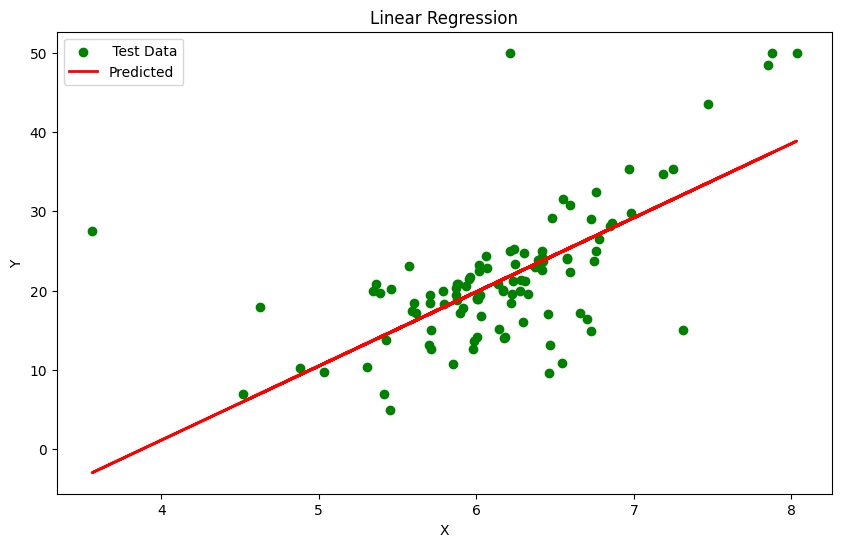

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test, color='green', label=' Test Data')
plt.plot( x_test,y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

2. Multiple Linear Regression

1. Load a dataset with multiple features (e.g., Advertising dataset).

In [26]:
advertising_df= pd.read_csv('advertising.csv')
advertising_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
advertising_df.shape

(200, 4)

2. Train a Multiple Linear Regression model.

In [28]:
X= advertising_df.drop('Sales', axis=1)
y= advertising_df['Sales']
x_train,x_test,y_train,y_test=train_test_split(X, y , test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

3. Evaluate model performance and interpret coefficients.

In [34]:
from sklearn.metrics import accuracy_score
print("R2 Score: ",np.round(r2_score(y_test, y_pred),2))
print("MSE: ", np.round(mean_squared_error(y_test, y_pred),2))
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

R2 Score:  0.91
MSE:  2.91
Coefficients:  [0.05450927 0.10094536 0.00433665]
Intercept:  4.714126402214127


4. Perform feature selection and observe its impact on model accuracy.

In [36]:
#the second column radio is more important as we can see from the weights in model coefficients
from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=1)
selector.fit(x_train, y_train)

selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Radio'], dtype='object')


In [38]:
# Impact on model accuracy
X= advertising_df['Radio']
y= advertising_df['Sales']
x_train,x_test,y_train,y_test=train_test_split(X, y , test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train)
y_pred= model.predict(x_test.values.reshape(-1,1))
print("R2 Score: ",np.round(r2_score(y_test, y_pred),2))
print("MSE: ", np.round(mean_squared_error(y_test, y_pred),2))

R2 Score:  0.11
MSE:  27.6


Impact:

R2 score has been dropped from 0.91 to 0.11

MSE has been increased from 2.91 to 27.6

3. Logistic Regression

Load a classification dataset (e.g., Breast Cancer dataset).

In [41]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

df= pd.DataFrame(X, columns=data.feature_names)
df['target']= y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


2. Train a Logistic Regression model.


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X= df.drop('target', axis=1)
y= df['target']
model= LogisticRegression(max_iter=5000)
x_train,x_test,y_train,y_test=train_test_split(X, y , test_size=0.2, random_state=42)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

3. Evaluate the model using accuracy, confusion matrix, precision, recall, and F1-score.


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Accuracy: ", np.round(accuracy_score(y_test, y_pred),2))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Precision: ", np.round(precision_score(y_test, y_pred),2))
print("Recall: ", np.round(recall_score(y_test, y_pred),2))
print("F1-score: ", np.round(f1_score(y_test, y_pred),2))


Accuracy:  0.96
Confusion Matrix: 
 [[39  4]
 [ 1 70]]
Precision:  0.95
Recall:  0.99
F1-score:  0.97


In [55]:

selector = RFE(model, n_features_to_select=2)
selector.fit(x_train, y_train)

selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['worst compactness', 'worst concavity'], dtype='object')


4. Plot the decision boundary for better understanding.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


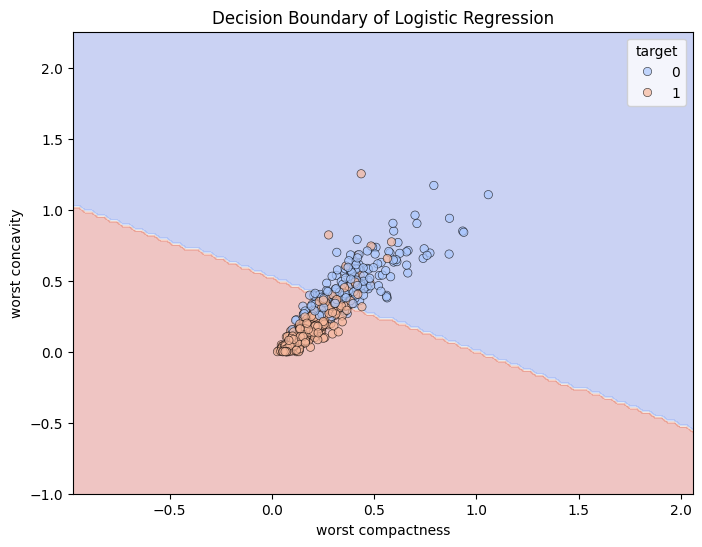

In [60]:
import seaborn as sns
x_min, x_max = X['worst compactness'].min() - 1, X['worst compactness'].max() + 1
y_min, y_max = X['worst concavity'].min() - 1, X['worst concavity'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

model= LogisticRegression(max_iter=5000)
model.fit(x_train[['worst compactness', 'worst concavity']], y_train)
# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Decision boundary
sns.scatterplot(x=X['worst compactness'], y=X['worst concavity'], hue=y, edgecolor='k', palette='coolwarm', alpha=0.7)
plt.xlabel("worst compactness")
plt.ylabel("worst concavity")
plt.title("Decision Boundary of Logistic Regression")
plt.show()

4. Decision Tree

1. Load a dataset (e.g., Iris dataset).

In [62]:
iris_df= pd.read_csv('iris_data.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Train a Decision Tree classifier.

In [63]:
from sklearn.tree import DecisionTreeClassifier

X= iris_df.drop('species', axis=1)
y= iris_df['species']
x_train,x_test,y_train,y_test=train_test_split(X, y , test_size=0.2, random_state=42)
dtc= DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
y_pred= dtc.predict(x_test)



3. Visualize the tree structure.

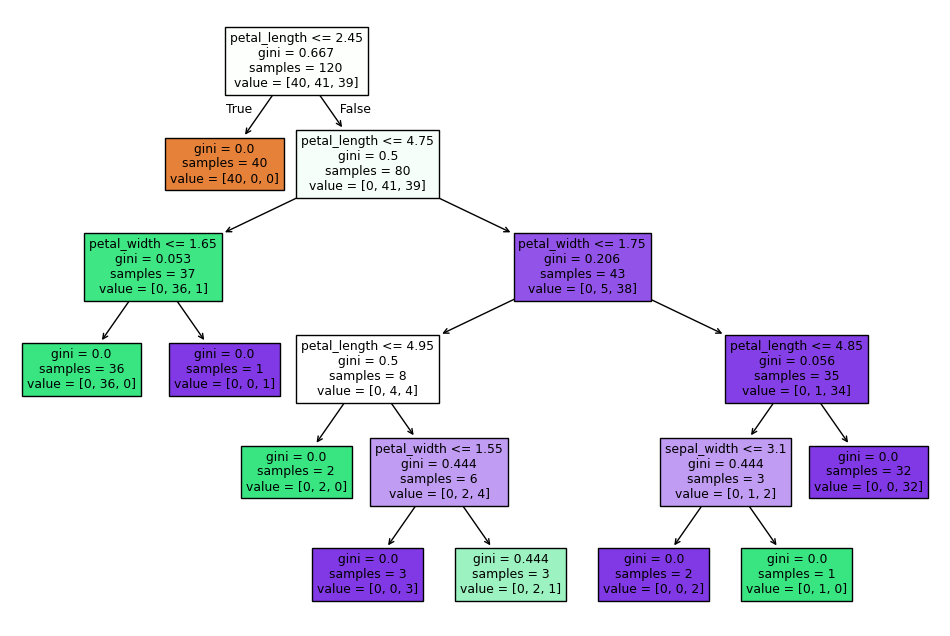

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()

In [66]:
accuracy_score(y_test,y_pred)

1.0

4. Analyze the effect of tree depth and pruning on model performance.

In [67]:
dtc= DecisionTreeClassifier(max_depth=7, min_samples_split=10, max_leaf_nodes=5)
dtc.fit(x_train,y_train)
y_pred= dtc.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

5. Naïve Bayes

1. Load a text classification dataset (e.g., SMS Spam Collection dataset).

In [69]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df.columns=['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


2. Preprocess the text data (tokenization, TF-IDF vectorization).

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
vectorizer = TfidfVectorizer( stop_words='english', tokenizer=word_tokenize)
X = vectorizer.fit_transform(df['message'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Data preprocessing completed!


3. Train a Naïve Bayes classifier and evaluate its performance.

In [76]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(X_train, y_train)
y_pred= mnb.predict(X_test)

print("Accuracy Score: " , np.round(accuracy_score(y_test, y_pred),2))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.96
Confusion Matrix:  [[965   0]
 [ 43 107]]


4. Interpret the classification results.

True Negatives (TN) = 965 → Model correctly classified 965 non-spam messages as not spam.

False Positives (FP) = 0 → Model never misclassified a non-spam message as spam.

False Negatives (FN) = 43 → Model misclassified 43 spam messages as not spam.

True Positives (TP) = 107 → Model correctly classified 107 spam messages as spam.